# Diamond Price Prediction

# Introdution About the Dataset:

The Dataset the goal is to predict price of given diamond (Refression Analysis)

There are 10 independent variables(including id):

•	Id: the unique identifier of each diamond.
•	Carat:  Carat weight of the cubic zirconia.
•	Cut:  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
•	Color:  Colour of the cubic zirconia.With D being the best and J the worst.
•	Clarity:  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
•	Depth:  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
•	Table:  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
•	Price:  the Price of the cubic zirconia.
•	X:  Length of the cubic zirconia in mm.
•	Y:  Width of the cubic zirconia in mm.
•	Z:  Height of the cubic zirconia in mm.


Target Variables:


In [1]:
import pandas as pd

In [3]:
# Data Ingestions Step
df=pd.read_csv('data/diamonds.csv')

In [4]:
df.head

<bound method NDFrame.head of           id  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  

In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#  No missing values present in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
## Lets drop the id column
df = df.drop(labels=['id'],axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Check for Duplicated records

df.duplicated().sum()

146

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Segregate numerical and categorical columns

numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print('numerical_columns: ',numerical_columns)
print("categorical_columns: ",categorical_columns)

numerical_columns:  Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
categorical_columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [21]:
df[categorical_columns].describe()

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [22]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [23]:
df['cut'].nunique()

5

In [24]:
df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [25]:
df['color'].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [28]:
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

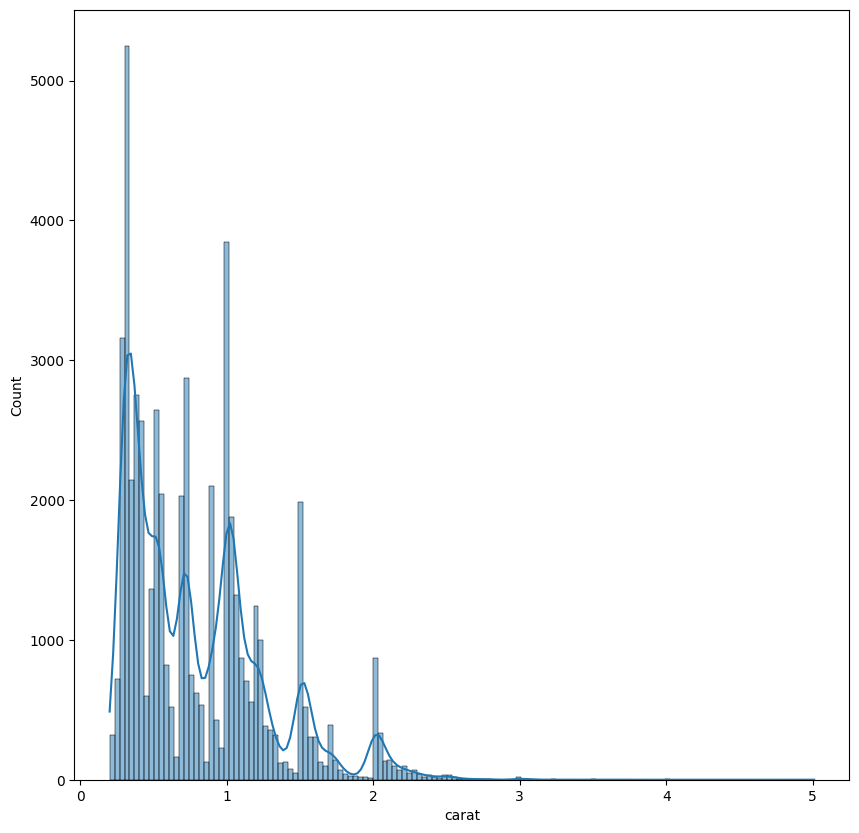

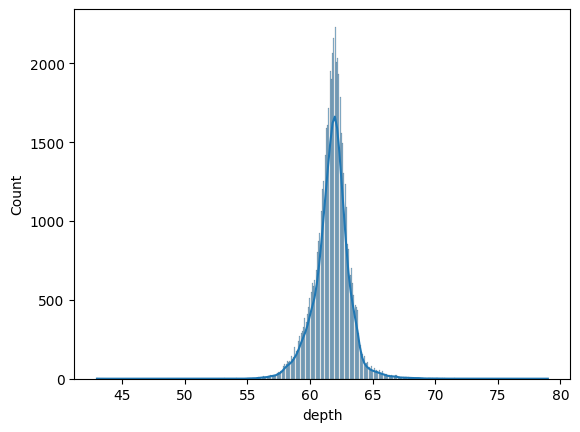

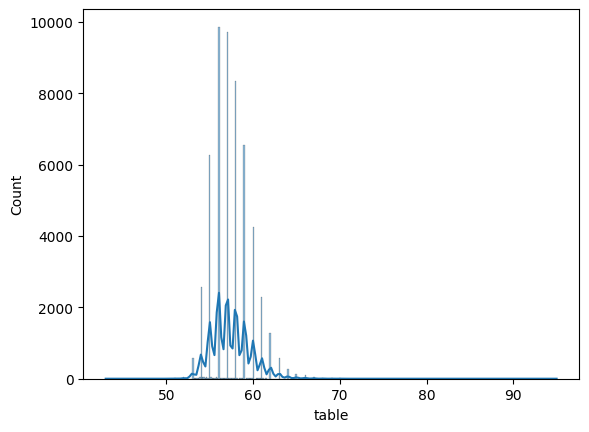

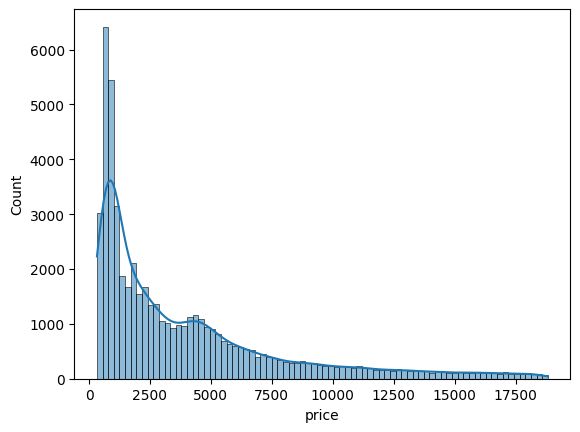

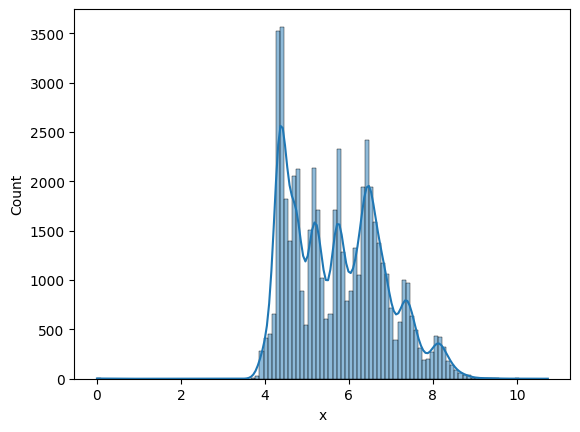

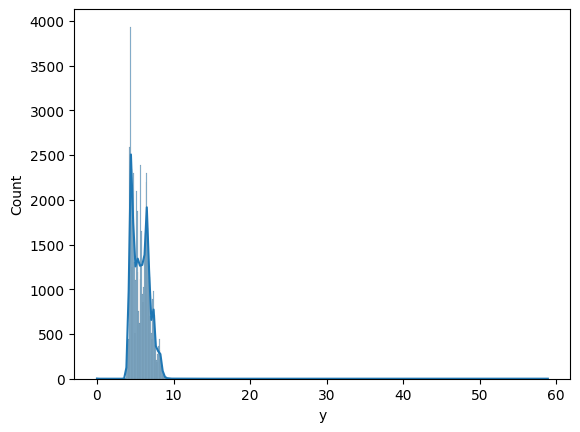

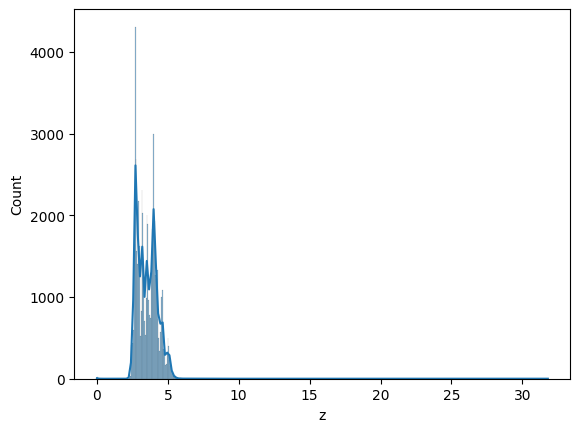

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

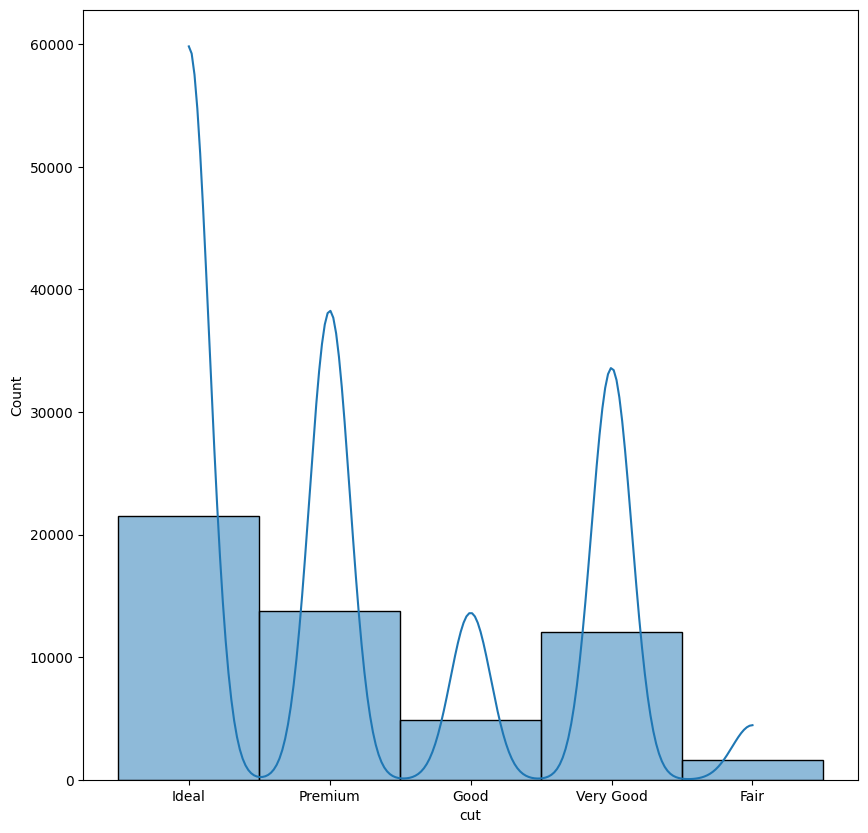

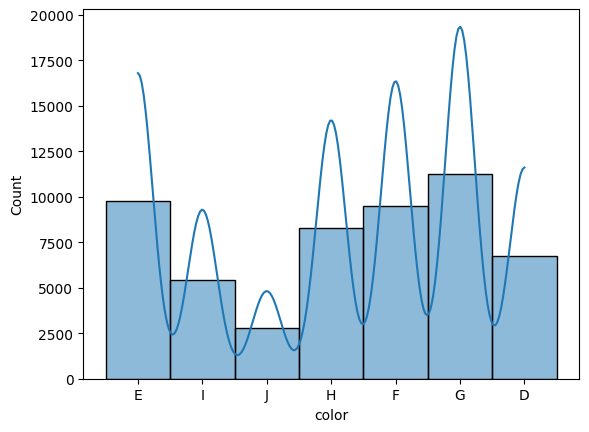

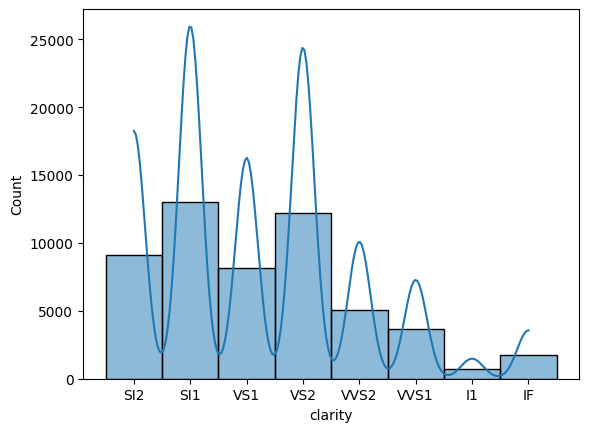

In [32]:
plt.figure(figsize=(10,10))
x=1
for i in categorical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

<Axes: >

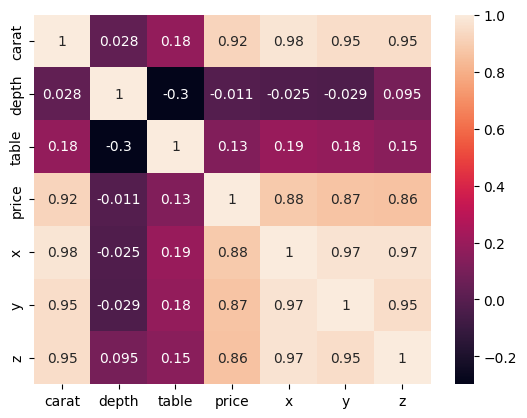

In [36]:
# Correleation

sns.heatmap(df[numerical_columns].corr(), annot=True)

In [40]:
## Currently we will not execute this
# df.drop(labels=['x','y','z'],axis=1)

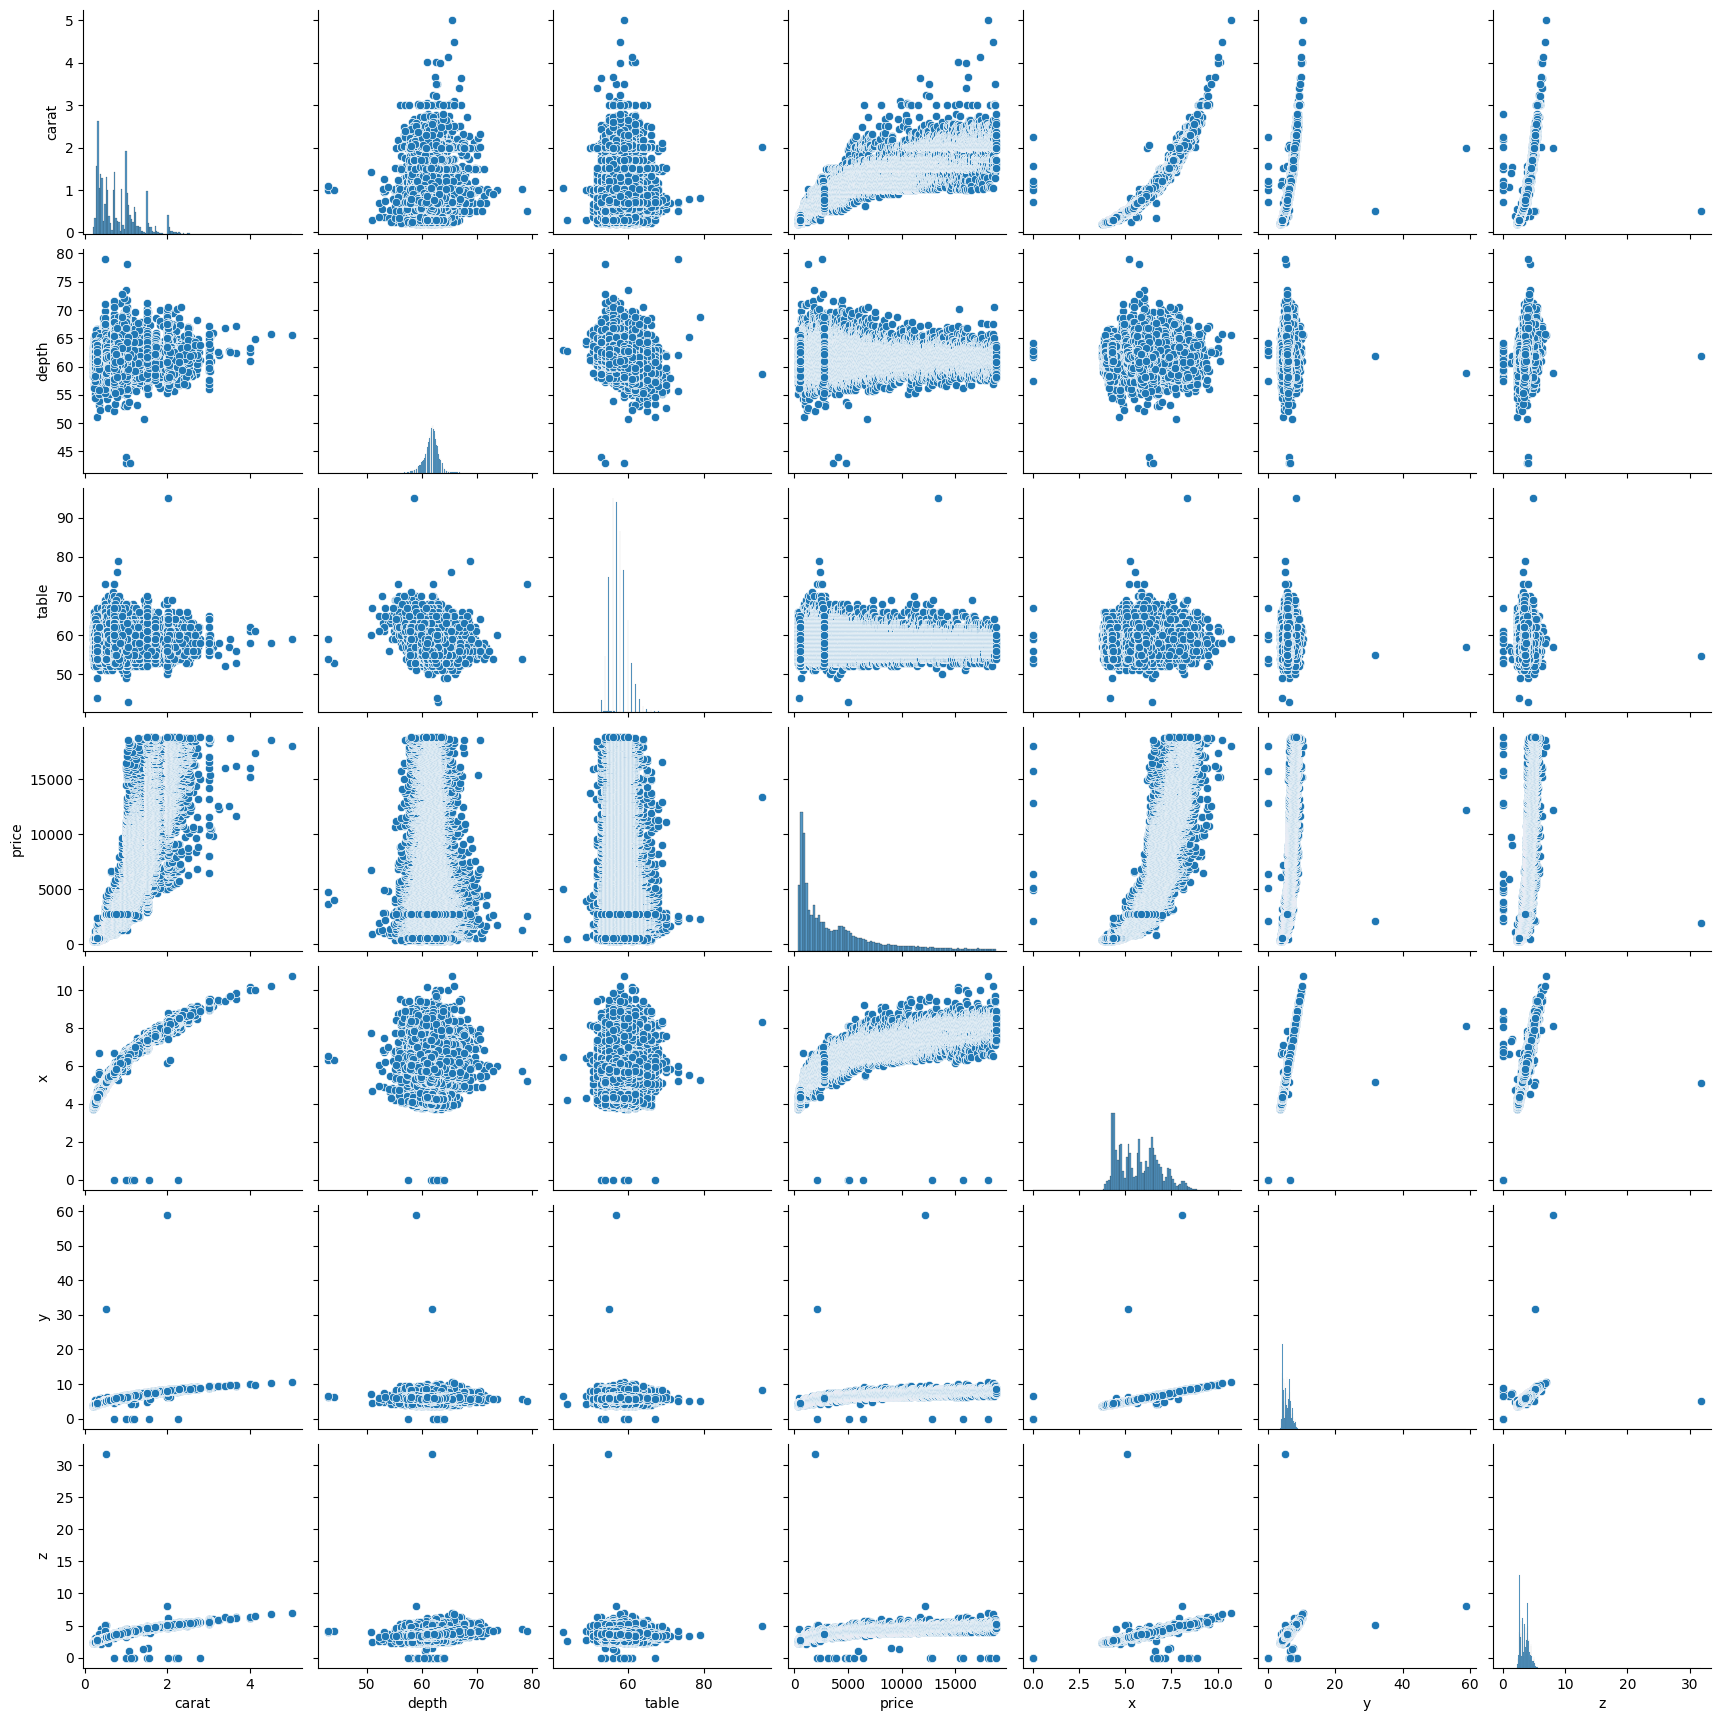

In [41]:
sns.pairplot(df)

In [42]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
cut_map={'Fair':1,"Good":2,"Very Good":3, "Premium":4, "Ideal":5}

In [48]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [49]:
clarity_map={'I1':1,"SI2":2,"SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

In [50]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [51]:
color_map={"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "j":7}

In [54]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [56]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2.0,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2.0,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2.0,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6.0,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,NaN,2,63.3,58.0,335,4.34,4.35,2.75
